Citim fisierul

In [51]:
import pandas as pd

df = pd.read_csv('/content/hackathon_train.csv', sep='|')

Verificam cate valori lipsa regasim in dataset pentru fiecare feature

In [52]:
df.isnull().sum()

,0
ssn,0
cc_num,0
first,0
last,0
gender,0
street,0
city,0
state,0
zip,0
lat,0


Procent de valori lipsa

In [53]:
df.isnull().mean().sort_values(ascending=False)

,0
ssn,0.0
cc_num,0.0
first,0.0
last,0.0
gender,0.0
street,0.0
city,0.0
state,0.0
zip,0.0
lat,0.0


Impartim dataset-ul in 2 parti:
  - X contine toate coloanele, mai putin is_fraud
  - y contine doar coloana is_fraud

  -> Fara aceasta separare modelul ar vedea coloana is_fraud si ar invata trivial sa prezica frauda

In [54]:
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

Impartim dataset-ul in 2 parti: una de antrenare, una de testare

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (592009, 25) Test: (148003, 25)


Procentele de frauda

In [56]:
y.value_counts(normalize=True)

,proportion
is_fraud,
0,0.87132
1,0.12868


In [57]:
# Păstrăm doar coloanele relevante
features = [
    'amt', 'lat', 'long', 'merch_lat', 'merch_long',
    'job', 'category', 'transaction_id', 'ssn',
    'cc_num', 'dob', 'acct_num', 'trans_num', 'trans_date',
    'trans_time', 'unix_time', 'merchant'
]
features = [c for c in features if c in X_train.columns]

X_train = X_train[features]
X_test = X_test[features]

Selectam coloanele pe care modelul sa le foloseasca

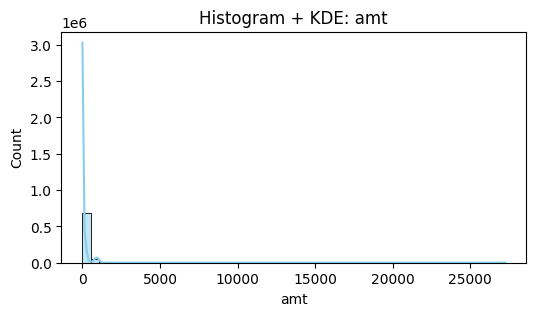

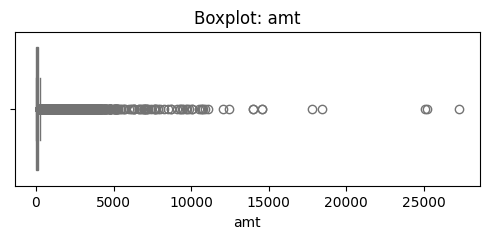

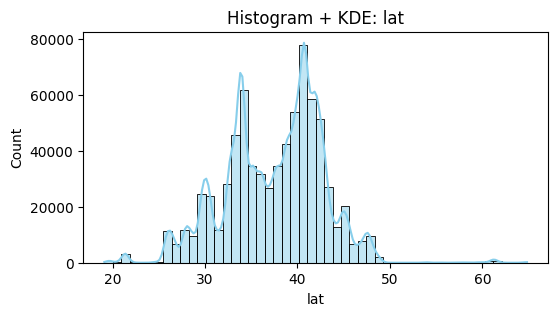

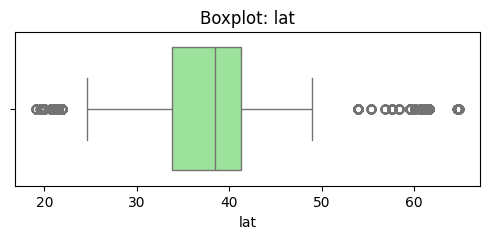

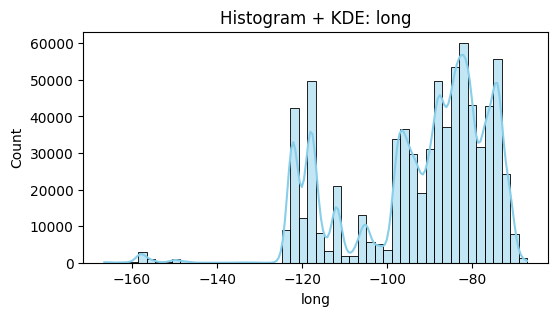

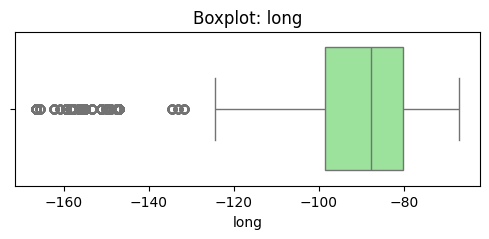

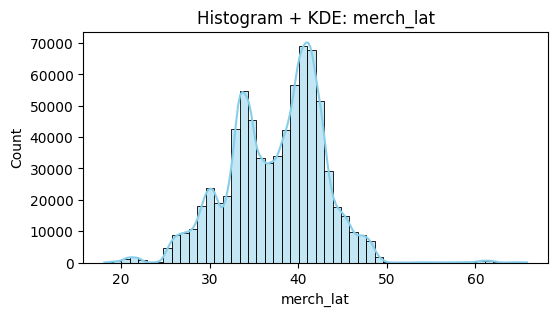

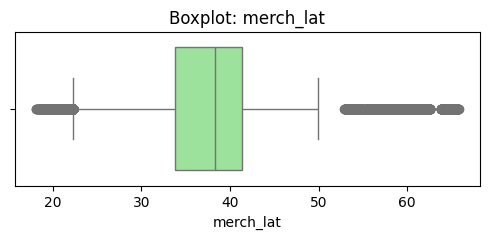

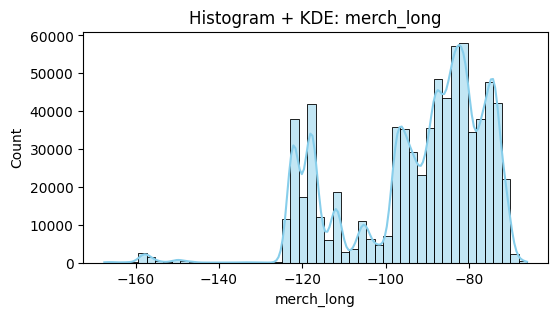

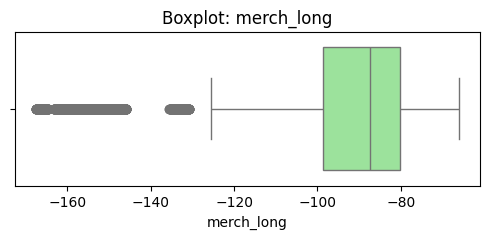

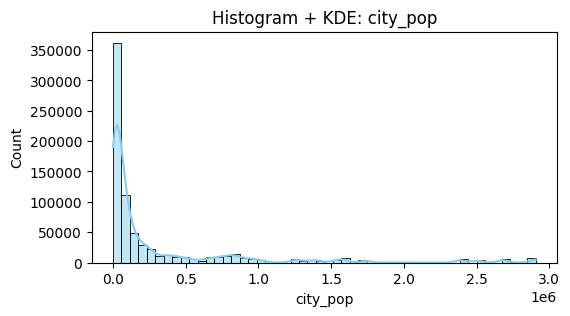

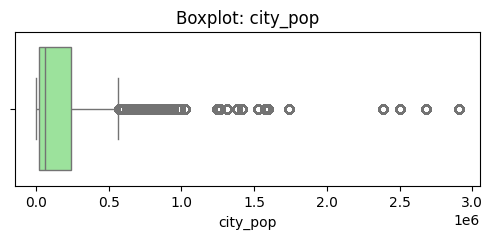

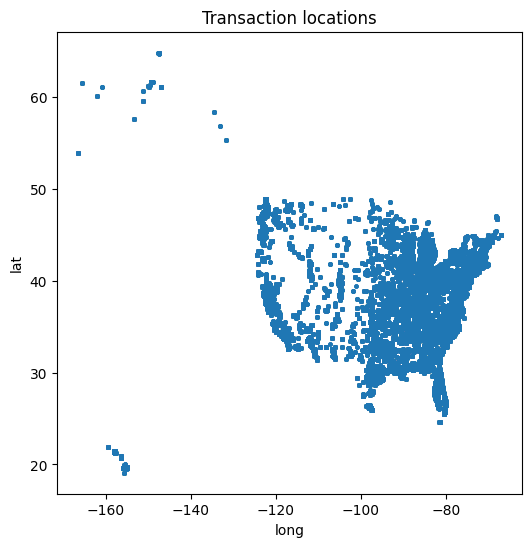

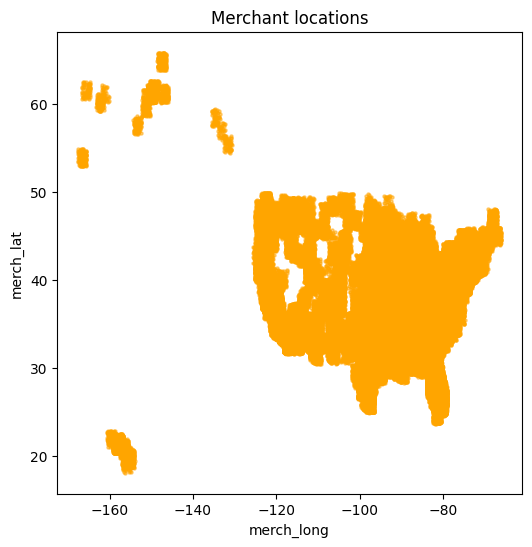

/tmp/ipython-input-3175244202.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vals.index, y=top_vals.values, palette='pastel')


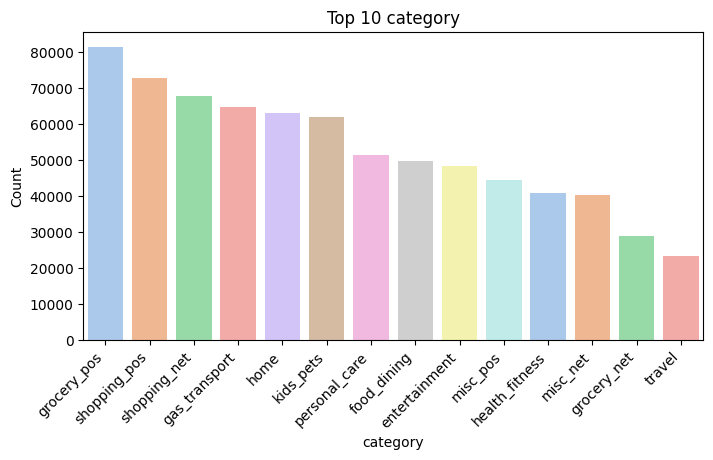

/tmp/ipython-input-3175244202.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vals.index, y=top_vals.values, palette='pastel')


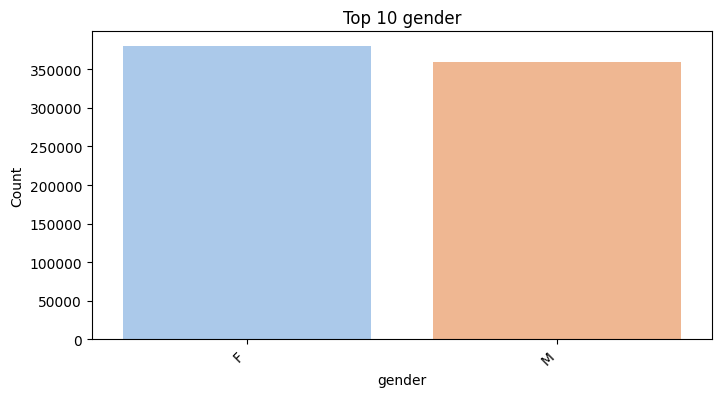

/tmp/ipython-input-3175244202.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vals.index, y=top_vals.values, palette='pastel')


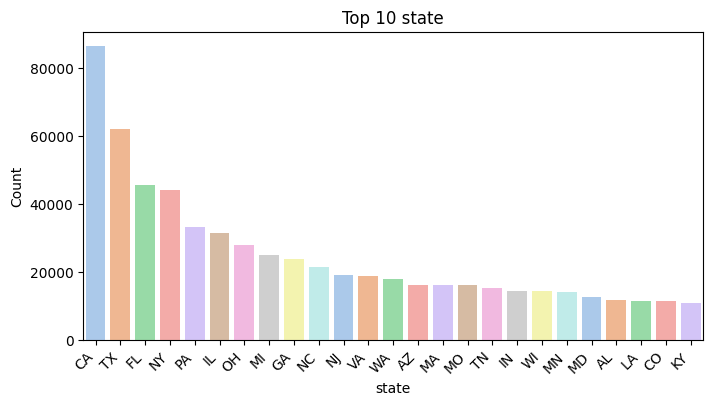

/tmp/ipython-input-3175244202.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vals.index, y=top_vals.values, palette='pastel')


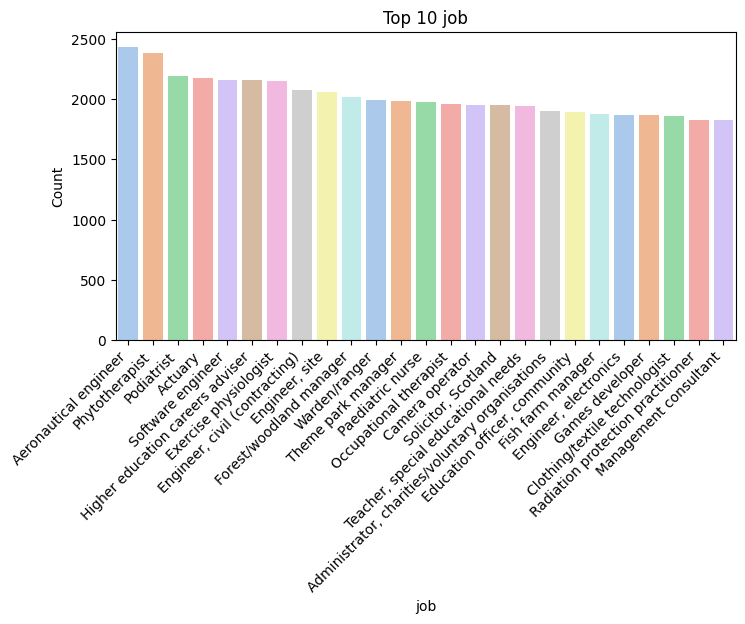

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Features importante
numeric_features = ['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop']
categorical_features = ['category', 'gender', 'state', 'job']

for col in numeric_features:
    # Histogram + KDE
    plt.figure(figsize=(6,3))
    sns.histplot(df[col].dropna(), kde=True, bins=50, color='skyblue')
    plt.title(f'Histogram + KDE: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col].dropna(), color='lightgreen')
    plt.title(f'Boxplot: {col}')
    plt.show()

# Transaction locations
plt.figure(figsize=(6,6))
plt.scatter(df['long'], df['lat'], s=5, alpha=0.5)
plt.xlabel('long')
plt.ylabel('lat')
plt.title('Transaction locations')
plt.show()

# Merchant locations
plt.figure(figsize=(6,6))
plt.scatter(df['merch_long'], df['merch_lat'], s=5, alpha=0.5, color='orange')
plt.xlabel('merch_long')
plt.ylabel('merch_lat')
plt.title('Merchant locations')
plt.show()

for col in categorical_features:
    # Dacă sunt multe categorii, luăm top 25 pentru vizualizare
    top_vals = df[col].value_counts().nlargest(25)
    plt.figure(figsize=(8,4))
    sns.barplot(x=top_vals.index, y=top_vals.values, palette='pastel')
    plt.title(f'Top 10 {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

Facem un plot pentru a vedea intervalul de sume pentru care se inregistreaza cele mai multe fraude

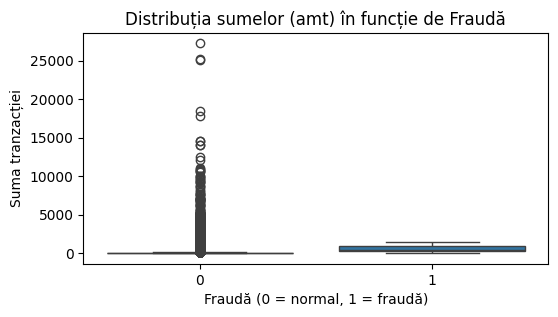

In [59]:
plt.figure(figsize=(6,3))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Distribuția sumelor (amt) în funcție de Fraudă')
plt.xlabel('Fraudă (0 = normal, 1 = fraudă)')
plt.ylabel('Suma tranzacției')
plt.show()

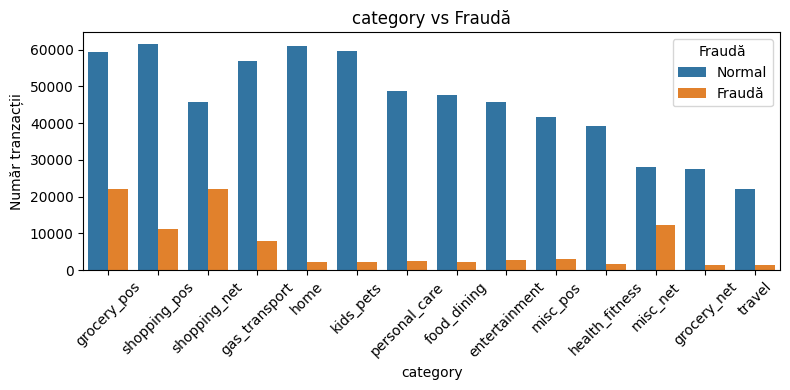

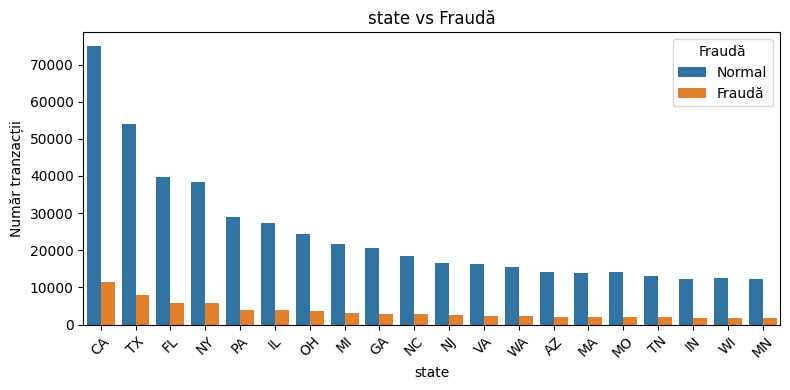

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['category', 'state']

for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='is_fraud', data=df,
                  order=df[col].value_counts().index[:20])  # top 20 valori pentru vizualizare
    plt.title(f'{col} vs Fraudă')
    plt.xlabel(col)
    plt.ylabel('Număr tranzacții')
    plt.xticks(rotation=45)
    plt.legend(title='Fraudă', labels=['Normal', 'Fraudă'])
    plt.tight_layout()
    plt.show()

Numarul de tranzactii per cont

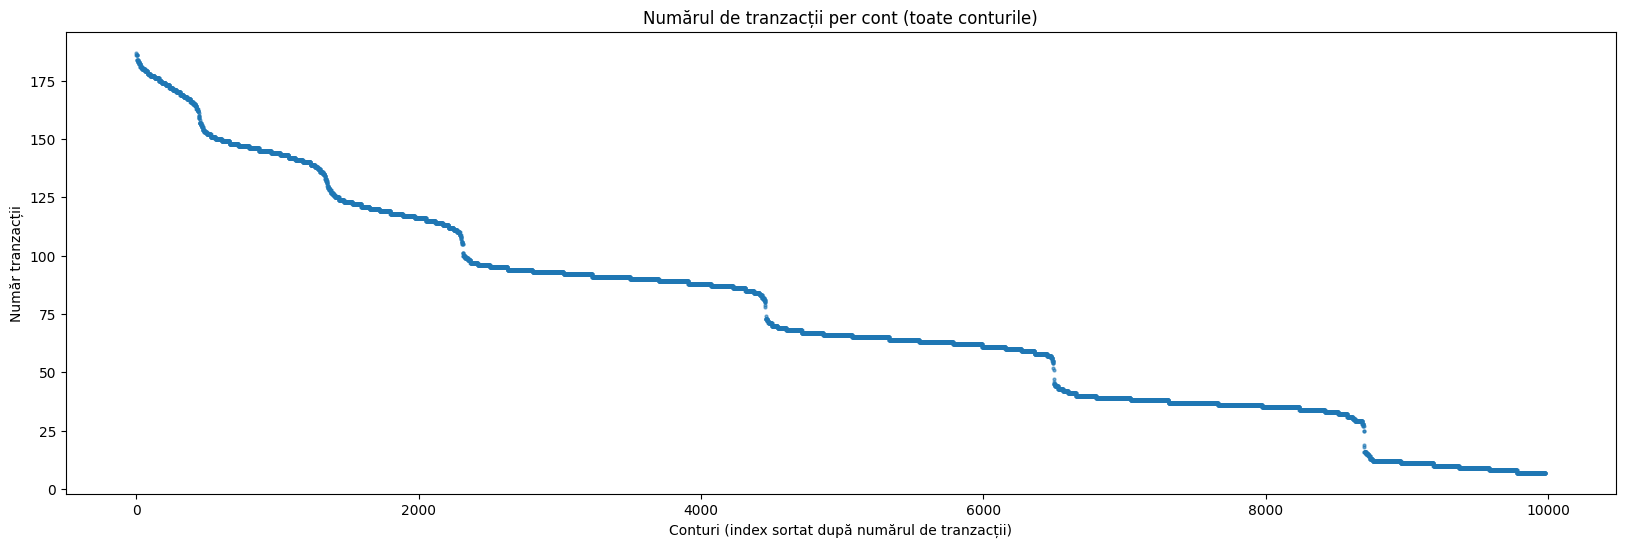

In [61]:
import matplotlib.pyplot as plt

# Numărul de tranzacții per cont
acct_counts = df['acct_num'].value_counts()  # Series: index = acct_num, value = nr tranzacții

plt.figure(figsize=(20,6))
plt.plot(acct_counts.values, marker='o', linestyle='', markersize=2, alpha=0.6)
plt.title('Numărul de tranzacții per cont (toate conturile)')
plt.xlabel('Conturi (index sortat după numărul de tranzacții)')
plt.ylabel('Număr tranzacții')
plt.show()

Afisam detalii despre tranzactiile frauduloase si ora la care sunt facute

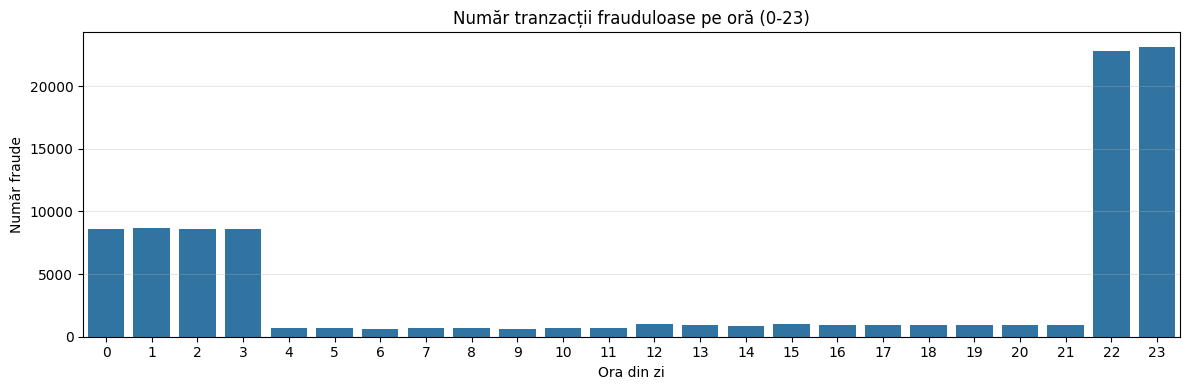

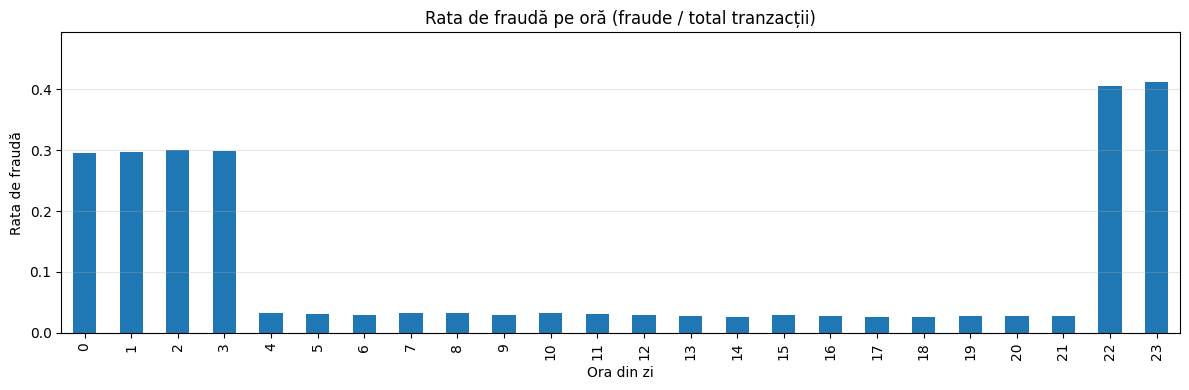

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_work = df.copy()

# 1) Extrage ora (încearcă trans_time, apoi unix_time, apoi trans_date+trans_time)
df_work['hour'] = np.nan

# a) trans_time (format HH:MM:SS sau similar)
if 'trans_time' in df_work.columns:
    df_work['hour'] = pd.to_datetime(df_work['trans_time'], format='%H:%M:%S', errors='coerce').dt.hour

# b) fallback la unix_time (dacă prima metodă nu a găsit ore)
if (df_work['hour'].isna().all()) and 'unix_time' in df_work.columns:
    # presupunem unitate în secunde; dacă e altceva adaptăm
    df_work['hour'] = pd.to_datetime(df_work['unix_time'], unit='s', errors='coerce').dt.hour

# c) fallback la combinarea trans_date + trans_time
if (df_work['hour'].isna().all()) and {'trans_date','trans_time'}.issubset(df_work.columns):
    df_work['ts'] = pd.to_datetime(df_work['trans_date'].astype(str) + ' ' + df_work['trans_time'].astype(str),
                                   errors='coerce')
    df_work['hour'] = df_work['ts'].dt.hour

# dacă tot avem NaN ore, le eliminăm pentru calcule (sau le putem păstra separat)
df_work = df_work.dropna(subset=['hour'])
df_work['hour'] = df_work['hour'].astype(int)

# filtrăm doar fraudele
frauds = df_work[df_work['is_fraud'] == 1].copy()

# Număr fraude per oră
plt.figure(figsize=(12,4))
order = list(range(24))
sns.countplot(x='hour', data=frauds, order=order)
plt.title('Număr tranzacții frauduloase pe oră (0-23)')
plt.xlabel('Ora din zi')
plt.ylabel('Număr fraude')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Rata de fraudă per oră (fraude / total tranzacții)
total_per_hour = df_work.groupby('hour').size()
fraud_per_hour = frauds.groupby('hour').size()
fraud_rate = (fraud_per_hour / total_per_hour).reindex(range(24), fill_value=0)

plt.figure(figsize=(12,4))
fraud_rate.plot(kind='bar')
plt.title('Rata de fraudă pe oră (fraude / total tranzacții)')
plt.xlabel('Ora din zi')
plt.ylabel('Rata de fraudă')
plt.ylim(0, max(fraud_rate.max()*1.2, 0.01))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Adaugam coloane relevante pe baza celor 2 ploturi

In [63]:
import pandas as pd

# Copiem dataframe-ul original
df_new = df.copy()

# Asigurăm că trans_time e convertibil la oră
df_new['hour'] = pd.to_datetime(df_new['trans_time'], format='%H:%M:%S', errors='coerce').dt.hour

# Nivel de risc pe baza numărului de fraude pe ora

def hour_fraud_level(h):
    if h in [22, 23]:
        return 'mare'
    elif h in [0, 1, 2, 3]:
        return 'mediu'
    else:
        return 'mic'

df_new['hour_fraud_level'] = df_new['hour'].apply(hour_fraud_level)

# Nivel de risc pe baza ratei (fraude/total tranzacții)
def hour_fraud_rate_level(h):
    if h in [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]:
        return 'mare'
    elif h in [0, 1, 2, 3]:
        return 'mediu'
    else:
        return 'mic'

df_new['hour_fraud_rate_level'] = df_new['hour'].apply(hour_fraud_rate_level)

In [64]:
# Ne asiguram ca coloanele sunt de tip datetime
X_train['trans_date_time'] = pd.to_datetime(X_train['trans_date'] + ' ' + X_train['trans_time'])
X_test['trans_date_time'] = pd.to_datetime(X_test['trans_date'] + ' ' + X_test['trans_time'])

X_train['TX_HOUR'] = X_train['trans_date_time'].dt.hour
X_test['TX_HOUR'] = X_test['trans_date_time'].dt.hour

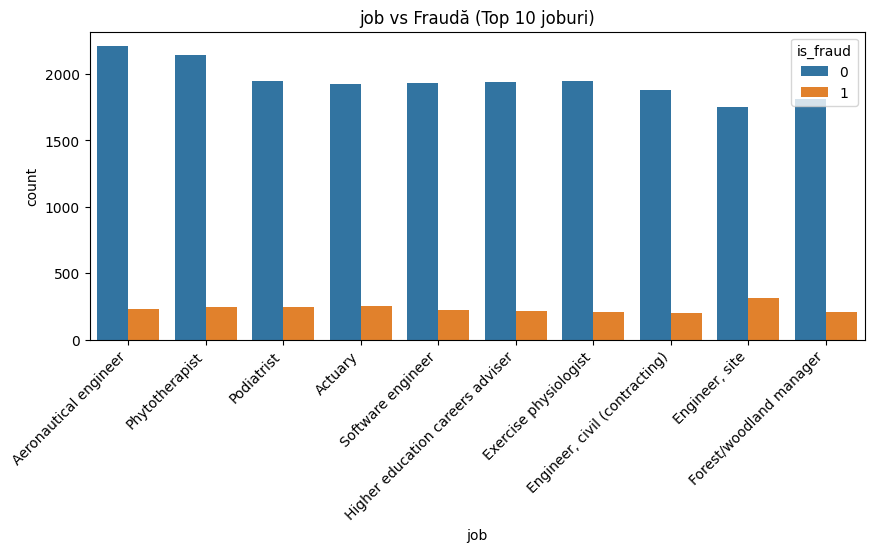

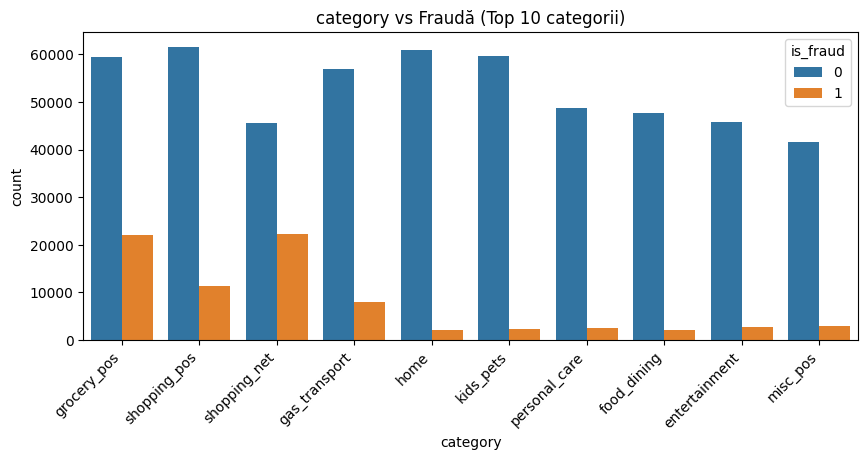

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10,4))
sns.countplot(x='job', hue='is_fraud', data=df, order=df['job'].value_counts().nlargest(10).index)
plt.title('job vs Fraudă (Top 10 joburi)')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x='category', hue='is_fraud', data=df, order=df['category'].value_counts().nlargest(10).index)
plt.title('category vs Fraudă (Top 10 categorii)')
plt.xticks(rotation=45, ha='right')
plt.show()

Adaugam o noua coloana unde definim categoriile pe risc

In [66]:
# Definim categoriile pe risc
high_risk = ['shopping_net', 'grocery_pos']
medium_risk = ['gas_transport', 'misc_net', 'shopping_pos']

def fraud_risk(cat):
    if cat in high_risk:
        return 'mare'
    elif cat in medium_risk:
        return 'mediu'
    else:
        return 'mic'

# Creăm coloana nouă
df['category_risk'] = df['category'].apply(fraud_risk)

Am mai observat faptul ca daca un SSN face o tranzactie frauduloasa intr-o zi, toate tranzactiile facute de el in acea zi vor fi frauduloase

In [67]:
import pandas as pd

df_new['trans_date'] = pd.to_datetime(df_new['trans_date'], errors='coerce')

# Cream o coloană combinată: identifică unic o zi pentru un ssn
df_new['ssn_day'] = df_new['ssn'].astype(str) + '_' + df_new['trans_date'].dt.strftime('%Y-%m-%d')

# Pentru fiecare ssn_day, vedem dacă a existat o fraudă
fraud_by_ssn_day = df_new.groupby('ssn_day')['is_fraud'].max()

df_new['ssn_fraud_day_flag'] = df_new['ssn_day'].map(fraud_by_ssn_day)

# Stergem coloana auxiliara
df_new = df_new.drop(columns=['ssn_day'])

In [68]:
df_new.shape

(740012, 30)

In [69]:
# Copiem coloanele calculate din df_new în X_train și X_test
X_train['hour'] = pd.to_datetime(X_train['trans_time'], format='%H:%M:%S', errors='coerce').dt.hour
X_test['hour']  = pd.to_datetime(X_test['trans_time'],  format='%H:%M:%S', errors='coerce').dt.hour

# hour_fraud_level
def hour_fraud_level(h):
    if h in [22, 23]:
        return 'mare'
    elif h in [0, 1, 2, 3]:
        return 'mediu'
    else:
        return 'mic'

X_train['hour_fraud_level'] = X_train['hour'].apply(hour_fraud_level)
X_test['hour_fraud_level']  = X_test['hour'].apply(hour_fraud_level)

# hour_fraud_rate_level
def hour_fraud_rate_level(h):
    if h in [22, 23]:
        return 'mare'
    elif h in [0,1,2,3,12,13,14,15,16,17,18,19,20,21]:
        return 'mediu'
    else:
        return 'mic'

X_train['hour_fraud_rate_level'] = X_train['hour'].apply(hour_fraud_rate_level)
X_test['hour_fraud_rate_level']  = X_test['hour'].apply(hour_fraud_rate_level)

In [70]:
features_to_keep = [
    'amt', 'lat', 'long', 'merch_lat', 'merch_long',
    'job', 'category', 'merchant',
    'hour', 'hour_fraud_level', 'hour_fraud_rate_level'
]

# --- Aplicăm regula direct pe etichete ---
THRESHOLD = 55000.0

# Suprainlocuim y_train
y_train_rule = y_train.copy()
y_train_rule[X_train['amt'] > THRESHOLD] = 1

# Suprainlocuim y_test
y_test_rule = y_test.copy()
y_test_rule[X_test['amt'] > THRESHOLD] = 1

X_train_enc = X_train[features_to_keep].copy()
X_test_enc = X_test[features_to_keep].copy()

In [71]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['job', 'category', 'merchant', 'hour_fraud_level', 'hour_fraud_rate_level']

X_train_enc = X_train[features_to_keep].copy()
X_test_enc  = X_test[features_to_keep].copy()

for col in categorical_cols:
    le = LabelEncoder()
    X_train_enc[col] = le.fit_transform(X_train_enc[col])
    X_test_enc[col]  = le.transform(X_test_enc[col])

In [72]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train_enc, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [73]:
y_pred = model.predict(X_test_enc)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    128958
           1       0.90      0.83      0.86     19045

    accuracy                           0.97    148003
   macro avg       0.94      0.91      0.92    148003
weighted avg       0.97      0.97      0.97    148003

[[127164   1794]
 [  3196  15849]]


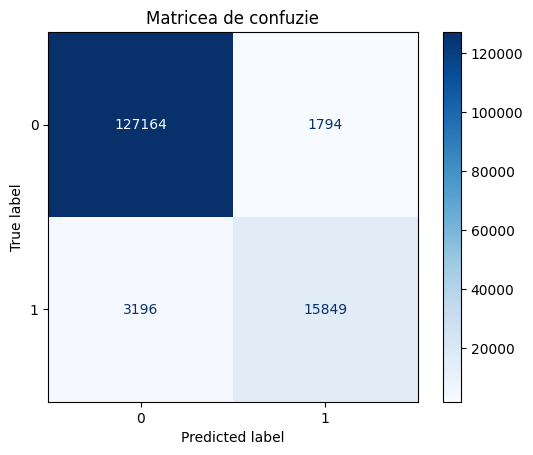

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1️⃣ Preziceri pe setul de test
y_pred = model.predict(X_test_enc)

# 2️⃣ Matricea de confuzie
cm = confusion_matrix(y_test, y_pred)

# 3️⃣ Vizualizare
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title("Matricea de confuzie")
plt.show()

In [75]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f"Acuratețea modelului: {acc:.4f} ({acc*100:.2f}%)")

Acuratețea modelului: 0.9663 (96.63%)
